In [1]:
import numpy as pnp
import pandas as pd
import matplotlib.pyplot as plt


Enter the number of options:  1
Enter option type (call or put):  put
Enter position (long or short):  long
Enter strike price (x):  50
Enter premium:  5
Enter the number of stocks:  1
Enter position (long or short):  long
Enter stock price (x):  100



Assets Details:
Option 1: {'type': 'option', 'option_type': 'put', 'position': 'long', 'strike_price': 50.0, 'premium': 5.0}
Stock 2: {'type': 'stock', 'position': 'long', 'stock_price': 100.0}

Asset Data Variable:
[{'type': 'option', 'option_type': 'put', 'position': 'long', 'strike_price': 50.0, 'premium': 5.0}, {'type': 'stock', 'position': 'long', 'stock_price': 100.0}]

Asset Data DataFrame:
     type option_type position  strike_price  premium  stock_price
0  option         put     long          50.0      5.0          0.0
1   stock           0     long           0.0      0.0        100.0


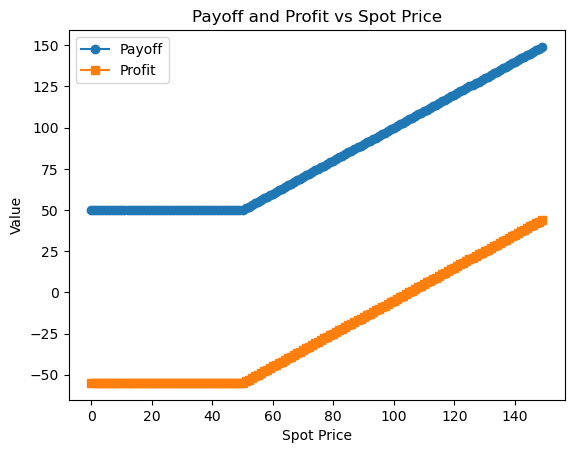

In [2]:
import pandas as pd

def get_asset_input(asset_type):
    if asset_type == 'option':
        option_type = input("Enter option type (call or put): ").lower()
        position = input("Enter position (long or short): ").lower()
        strike_price = float(input("Enter strike price (x): "))
        premium = float(input("Enter premium: "))
        return {'type': 'option', 'option_type': option_type, 'position': position, 'strike_price': strike_price, 'premium': premium}
    elif asset_type == 'stock':
        position_stock = input("Enter position (long or short): ").lower()
        stock_price = float(input("Enter stock price (x): "))
        return {'type': 'stock', 'position': position_stock, 'stock_price':stock_price}

def main():
    assets = []

    num_options = int(input("Enter the number of options: "))
    assets.extend(get_asset_input('option') for _ in range(num_options))

    num_stocks = int(input("Enter the number of stocks: "))
    assets.extend(get_asset_input('stock') for _ in range(num_stocks))

    print("\nAssets Details:")
    for i, asset in enumerate(assets, 1):
        print(f"{asset['type'].capitalize()} {i}: {asset}")

    return assets  # Return the assets list

if __name__ == "__main__":
    asset_data = main()
    # Now, asset_data contains the list of dictionaries with asset details
    print("\nAsset Data Variable:")
    print(asset_data)

    # Convert the list of dictionaries into a Pandas DataFrame
    asset_data = pd.DataFrame(asset_data)
    
    # Fill NaN values with 0
    asset_data.fillna(0, inplace=True)
    
    print("\nAsset Data DataFrame:")
    print(asset_data)

def calculate_total_payoff(asset_data,spot_price):
    total_payoff = 0
    total_profit=0
    
    for i in range(len(asset_data)):
        if asset_data['type'][i] == 'option':
            if asset_data['option_type'][i] == 'call':
                if asset_data['position'][i] == 'long':
                    payoff = max(0, spot_price - asset_data['strike_price'][i])
                    profit = payoff-asset_data['premium'][i]
                else:
                    payoff = -(max(0, spot_price - asset_data['strike_price'][i]))
                    profit = (payoff+asset_data['premium'][i])
            else:
                if asset_data['position'][i] == 'long':
                    payoff = max(0, asset_data['strike_price'][i] - spot_price)
                    profit = payoff-asset_data['premium'][i]
                else:
                    payoff = -(max(0, asset_data['strike_price'][i] - spot_price))
                    profit = (payoff+asset_data['premium'][i])
        else:
            if asset_data['position'][i] == 'long':
                payoff = spot_price
                profit = payoff-asset_data['stock_price'][i]
            else:
                payoff = -spot_price
                profit = payoff+asset_data['stock_price'][i]

        total_payoff += payoff
        total_profit += profit
    

    return total_payoff,total_profit
def payoff_profit(asset_data):
    scenario_stock_price_list = int(max(asset_data['strike_price']+100))
    result_list = [i for i in range(0, scenario_stock_price_list, 1)]
    payoff=[]
    profit=[]
    for spot_price in result_list:
        payoff.append(calculate_total_payoff(asset_data,spot_price)[0])
        profit.append(calculate_total_payoff(asset_data,spot_price)[1])
    data = {'Spot Price': result_list, 'Payoff': payoff, 'Profit': profit}
    df = pd.DataFrame(data)
    
    return df
df = payoff_profit(asset_data)
plt.plot(df['Spot Price'], df['Payoff'], label='Payoff', marker='o')
plt.plot(df['Spot Price'], df['Profit'], label='Profit', marker='s')

# Adding labels and title
plt.xlabel('Spot Price')
plt.ylabel('Value')
plt.title('Payoff and Profit vs Spot Price')

# Adding a legend
plt.legend()

# Displaying the graph
plt.show()


## The above strategy is called as protectie put (Long on Put and Stock)
